In [24]:
import pandas as pd
data=pd.read_csv('accidents.csv')
df=pd.DataFrame(data)
df

,Severity,StartTime,EndTime,StartLat,StartLng,Distance,Street,City,State,Zipcode,Temperature,Humidity,Pressure,Visibility,WindSpeed,Precipitation,WeatherCondition,Amenity,Bump,Crossing,GiveWay,Junction,NoExit,Railway,Roundabout,Station,Stop,TrafficCalming,TrafficSignal
0,2,2019-07-22 14:43:06,2019-07-22 16:22:19,34.789009,-82.483383,0.000,Highway 153,Greenville,SC,29611,93.0,45.0,28.86,10.0,16.0,0.00,Fair,False,False,False,False,False,False,False,False,False,False,False,False
1,2,2019-03-20 16:12:14,2019-03-20 16:41:05,40.998264,-76.650396,0.472,Continental Blvd,Danville,PA,17821,51.1,29.0,30.23,10.0,9.2,0.00,Clear,False,False,False,False,False,False,False,False,False,False,False,False
2,3,2018-12-12 14:19:18,2018-12-12 14:48:56,33.461292,-112.082001,0.000,I-10 W,Phoenix,AZ,85003,64.9,40.0,29.99,10.0,8.1,0.00,Partly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False
3,2,2018-03-09 08:02:11,2018-03-09 08:49:15,42.288445,-87.924911,0.000,Oak Spring Rd,Libertyville,IL,60048,27.0,63.0,30.04,10.0,5.8,0.00,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False
4,2,2020-03-27 05:36:56,2020-03-27 06:36:48,36.229259,-86.594650,0.000,Saundersville Rd,Old Hickory,TN,37138,68.0,65.0,29.20,10.0,7.0,0.00,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,3,2020-06-18 17:27:39,2020-06-18 17:42:39,41.574330,-87.496500,0.300,I-80 W,Hammond,IN,46324,83.0,38.0,29.33,10.0,8.0,0.00,Fair,False,False,False,False,False,False,False,False,False,False,False,False
99996,3,2017-11-14 12:41:46,2017-11-14 13:26:28,36.762577,-76.268204,0.000,I-464 S,Chesapeake,VA,23320,52.3,60.0,30.28,5.0,11.5,0.00,Haze,False,False,False,False,False,False,False,False,False,False,False,False
99997,3,2018-01-30 04:31:01,2018-01-30 05:05:00,42.928207,-78.898720,0.000,I-190 S,Buffalo,NY,14213,19.9,92.0,30.11,1.8,8.1,0.01,Light Snow,False,False,False,False,False,False,False,False,False,False,False,False
99998,4,2020-03-30 00:55:11,2020-03-30 02:15:09,40.693610,-73.394720,0.391,New Hwy,Copiague,NY,11726,47.0,86.0,29.80,10.0,13.0,0.00,Cloudy,False,False,False,False,False,False,False,False,False,False,False,True


In [25]:
df.dtypes
df['Bump'].dtypes

dtype('bool')

In [26]:
for col in df.columns:
    if df[col].dtypes == 'bool':
        df = pd.get_dummies(df, columns=[col])
df

,Severity,StartTime,EndTime,StartLat,StartLng,Distance,Street,City,State,Zipcode,Temperature,Humidity,Pressure,Visibility,WindSpeed,Precipitation,WeatherCondition,Amenity_False,Amenity_True,Bump_False,Bump_True,Crossing_False,Crossing_True,GiveWay_False,GiveWay_True,Junction_False,Junction_True,NoExit_False,NoExit_True,Railway_False,Railway_True,Roundabout_False,Roundabout_True,Station_False,Station_True,Stop_False,Stop_True,TrafficCalming_False,TrafficCalming_True,TrafficSignal_False,TrafficSignal_True
0,2,2019-07-22 14:43:06,2019-07-22 16:22:19,34.789009,-82.483383,0.000,Highway 153,Greenville,SC,29611,93.0,45.0,28.86,10.0,16.0,0.00,Fair,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0
1,2,2019-03-20 16:12:14,2019-03-20 16:41:05,40.998264,-76.650396,0.472,Continental Blvd,Danville,PA,17821,51.1,29.0,30.23,10.0,9.2,0.00,Clear,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0
2,3,2018-12-12 14:19:18,2018-12-12 14:48:56,33.461292,-112.082001,0.000,I-10 W,Phoenix,AZ,85003,64.9,40.0,29.99,10.0,8.1,0.00,Partly Cloudy,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0
3,2,2018-03-09 08:02:11,2018-03-09 08:49:15,42.288445,-87.924911,0.000,Oak Spring Rd,Libertyville,IL,60048,27.0,63.0,30.04,10.0,5.8,0.00,Mostly Cloudy,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0
4,2,2020-03-27 05:36:56,2020-03-27 06:36:48,36.229259,-86.594650,0.000,Saundersville Rd,Old Hickory,TN,37138,68.0,65.0,29.20,10.0,7.0,0.00,Mostly Cloudy,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,3,2020-06-18 17:27:39,2020-06-18 17:42:39,41.574330,-87.496500,0.300,I-80 W,Hammond,IN,46324,83.0,38.0,29.33,10.0,8.0,0.00,Fair,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0
99996,3,2017-11-14 12:41:46,2017-11-14 13:26:28,36.762577,-76.268204,0.000,I-464 S,Chesapeake,VA,23320,52.3,60.0,30.28,5.0,11.5,0.00,Haze,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0
99997,3,2018-01-30 04:31:01,2018-01-30 05:05:00,42.928207,-78.898720,0.000,I-190 S,Buffalo,NY,14213,19.9,92.0,30.11,1.8,8.1,0.01,Light Snow,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0
99998,4,2020-03-30 00:55:11,2020-03-30 02:15:09,40.693610,-73.394720,0.391,New Hwy,Copiague,NY,11726,47.0,86.0,29.80,10.0,13.0,0.00,Cloudy,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1


In [27]:
df=df.select_dtypes(exclude='object')
df

,Severity,StartLat,StartLng,Distance,Zipcode,Temperature,Humidity,Pressure,Visibility,WindSpeed,Precipitation,Amenity_False,Amenity_True,Bump_False,Bump_True,Crossing_False,Crossing_True,GiveWay_False,GiveWay_True,Junction_False,Junction_True,NoExit_False,NoExit_True,Railway_False,Railway_True,Roundabout_False,Roundabout_True,Station_False,Station_True,Stop_False,Stop_True,TrafficCalming_False,TrafficCalming_True,TrafficSignal_False,TrafficSignal_True
0,2,34.789009,-82.483383,0.000,29611,93.0,45.0,28.86,10.0,16.0,0.00,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0
1,2,40.998264,-76.650396,0.472,17821,51.1,29.0,30.23,10.0,9.2,0.00,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0
2,3,33.461292,-112.082001,0.000,85003,64.9,40.0,29.99,10.0,8.1,0.00,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0
3,2,42.288445,-87.924911,0.000,60048,27.0,63.0,30.04,10.0,5.8,0.00,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0
4,2,36.229259,-86.594650,0.000,37138,68.0,65.0,29.20,10.0,7.0,0.00,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,3,41.574330,-87.496500,0.300,46324,83.0,38.0,29.33,10.0,8.0,0.00,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0
99996,3,36.762577,-76.268204,0.000,23320,52.3,60.0,30.28,5.0,11.5,0.00,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0
99997,3,42.928207,-78.898720,0.000,14213,19.9,92.0,30.11,1.8,8.1,0.01,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0
99998,4,40.693610,-73.394720,0.391,11726,47.0,86.0,29.80,10.0,13.0,0.00,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1


In [36]:
for c in df:
    df[c] = (df[c] - df[c].min()) / (df[c].max() - df[c].min())

In [31]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# K-Means algoritmasını kullanarak kümeleme işlemi
kmeans = KMeans(n_clusters=3) 
kmeans.fit(df)
df['Label'] = kmeans.labels_
# Küme merkezlerini alın
cluster_centers = kmeans.cluster_centers_

print(df['Label'])

0        1
1        1
2        2
3        0
4        1
        ..
99995    0
99996    1
99997    1
99998    1
99999    2
Name: Label, Length: 100000, dtype: int32


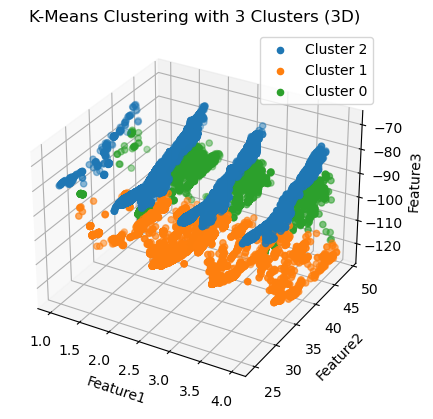

In [35]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Her küme için ayrı renkler kullanarak verileri 3D uzayda görselleştirme
for label in df['Label'].unique():
    cluster_data = df[df['Label'] == label]
    ax.scatter(cluster_data['Severity'], cluster_data['StartLat'], cluster_data['StartLng'], label=f'Cluster {label}')

ax.set_xlabel('Feature1')
ax.set_ylabel('Feature2')
ax.set_zlabel('Feature3')
ax.set_title('K-Means Clustering with 3 Clusters (3D)')
ax.legend()
plt.show()

In [50]:
    stds = []
    means_group = []
    for g in df.groupby(by = ['Label']):
        mean = g[1].mean().to_dict()
        mean = {k:round(v,2) for k,v in mean.items()}

        del mean['Label']

        std = g[1].std().to_dict()
        std = {k:round(v,2) for k,v in std.items()}

        del std['Label']

        std_mean = np.mean(list(std.values()))
        stds.append( std_mean )

        print(mean)
        print("=======================")

{'Severity': 0.47, 'StartLat': 0.66, 'StartLng': 0.64, 'Distance': 0.0, 'Zipcode': 0.55, 'Temperature': 0.48, 'Humidity': 0.7, 'Pressure': 0.96, 'Visibility': 0.11, 'WindSpeed': 0.01, 'Precipitation': 0.0, 'Amenity_False': 0.99, 'Amenity_True': 0.01, 'Bump_False': 1.0, 'Bump_True': 0.0, 'Crossing_False': 0.94, 'Crossing_True': 0.06, 'GiveWay_False': 1.0, 'GiveWay_True': 0.0, 'Junction_False': 0.92, 'Junction_True': 0.08, 'NoExit_False': 1.0, 'NoExit_True': 0.0, 'Railway_False': 0.99, 'Railway_True': 0.01, 'Roundabout_False': 1.0, 'Roundabout_True': 0.0, 'Station_False': 0.98, 'Station_True': 0.02, 'Stop_False': 0.99, 'Stop_True': 0.01, 'TrafficCalming_False': 1.0, 'TrafficCalming_True': 0.0, 'TrafficSignal_False': 0.83, 'TrafficSignal_True': 0.17}
{'Severity': 0.43, 'StartLat': 0.46, 'StartLng': 0.2, 'Distance': 0.0, 'Zipcode': 0.89, 'Temperature': 0.55, 'Humidity': 0.6, 'Pressure': 0.96, 'Visibility': 0.12, 'WindSpeed': 0.01, 'Precipitation': 0.0, 'Amenity_False': 0.99, 'Amenity_True'